#### Example conversion jp2 to zarr

In [ ]:
import glymur
import zarr

glymur.set_option('lib.num_threads', 2)
jp2 = glymur.Jp2k('/home/rohan/Dropbox/0539046440-0050.jp2')
print('jp2 image shape {}'.format(jp2.shape))
zarr.save('/home/rohan/Dropbox/test.zarr', jp2[:])

#### Compare `uint16` to `uint8` type conversion

Matching the uint16-->uint8 conversion function to that used to obtain the reference .tiff image set that were used to train the network. 

In [1]:
import zarr
from aicsimageio import imread
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
#Reference green channel patch:
ref_g = imread('/home/rohan/Dropbox/AllenInstitute/CellCount/dat/raw/Unet_tiles_082020_G/527100_1027993339_0050_tile_3_6_green.tif')
ref_g = np.squeeze(ref_g)

ref_r = imread('/home/rohan/Dropbox/AllenInstitute/CellCount/dat/raw/Unet_tiles_082020_R/527100_1027993339_0050_tile_3_6_red.tif')
ref_r = np.squeeze(ref_r)

#Open uint8 zarr file and cut patch corresponding to reference patch:
f = zarr.open('/home/rohan/Desktop/test.zarr/')
test_g = np.squeeze(f[6144:8192,12288:14336,1])
test_r = np.squeeze(f[6144:8192,12288:14336,0])

print(f'ref_g : {ref_g.dtype}')
print(f'ref_r : {ref_r.dtype}')
print(f'test_g : {test_g.dtype}')
print(f'test_r : {test_r.dtype}')

ref_g : uint8
ref_r : uint8
test_g : uint16
test_r : uint16


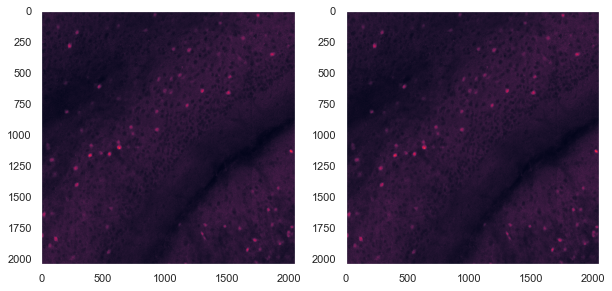

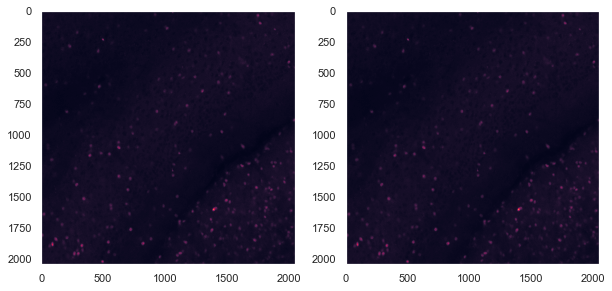

In [3]:
#Plot side by side:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ref_g)
plt.grid(False)
plt.subplot(122)
plt.imshow(test_g)
plt.grid(False)
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ref_r)
plt.grid(False)
plt.subplot(122)
plt.imshow(test_r)
plt.grid(False)
plt.show()

In [4]:
def convert_u16_to_u8(im_u16):
    assert im_u16.dtype=='uint16', "Input must be uint16"
    return np.uint8(np.round(im_u16.astype(float)*(2**8)/(2**16-1)))

In [5]:
test_g_u8 = convert_u16_to_u8(test_g)
test_r_u8 = convert_u16_to_u8(test_r)

assert np.array_equal(test_g_u8,ref_g), "converted does not match reference for green"
assert np.array_equal(test_r_u8,ref_r), "converted does not match reference for red"

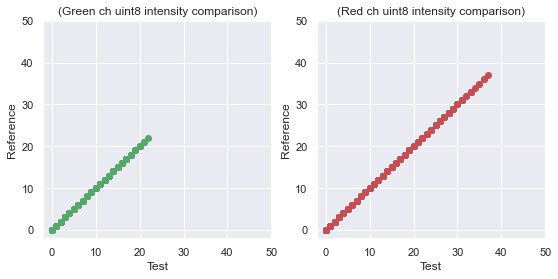

In [6]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.scatter(np.ravel(test_g_u8),np.ravel(ref_g),c='g')
ax = plt.gca()
ax.set_title('(Green ch uint8 intensity comparison)')
ax.set_ylabel('Reference')
ax.set_xlabel('Test')
ax.set_xlim(-2,50)
ax.set_ylim(-2,50)

plt.subplot(122)
plt.scatter(np.ravel(test_r_u8),np.ravel(ref_r),c='r')
ax = plt.gca()
ax.set_title('(Red ch uint8 intensity comparison)')
ax.set_ylabel('Reference')
ax.set_xlabel('Test')
ax.set_xlim(-2,50)
ax.set_ylim(-2,50)
plt.show()